<a href="https://colab.research.google.com/github/sheramir/MIT-DS/blob/main/Hotel_Booking_Cancellation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification Project - Hotel Booking Cancellation Prediction**


Welcome to the project on classification. We will use the **INN Hotels dataset** for this project.

--------------------------------
## **Context**
-------------------------------

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include changes of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers' booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings potentially impacts a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices at last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

----------------------------
## **Objective**
-----------------------------

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting **which booking is likely to be canceled**. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You, as a data scientist, have to analyze the data provided to find which **factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.**


--------------------------
## **Data Description**
--------------------------

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: The unique identifier of each booking

* no_of_adults: The number of adults

* no_of_children: The number of children

* no_of_weekend_nights: The number of weekend nights (Saturday and Sunday) the guest stayed or booked to stay at the hotel

* no_of_week_nights: The number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel

* type_of_meal_plan: The type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)

* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

* room_type_reserved: The type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

* lead_time: The number of days between the date of booking and the arrival date

* arrival_year: The year of arrival date

* arrival_month: The month of arrival date

* arrival_date: The date of the month

* market_segment_type: Market segment designation.

* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

* no_of_previous_cancellations: The number of previous bookings that were canceled by the customer before the current booking

* no_of_previous_bookings_not_canceled: The number of previous bookings not canceled by the customer before the current booking

* avg_price_per_room: The average price per day for the reservation; prices of the rooms are dynamic. (in euros)

* no_of_special_requests: The total number of special requests made by the customer (e.g. high floor, view from the room, etc.)

* booking_status: Flag indicating if the booking was canceled or not. The class 0 represents the Not_Canceled whereas class 1 represents the Canceled label.

## **Importing the necessary libraries and overview of the dataset**

In [91]:
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report,f1_score

from sklearn import metrics
from sklearn.metrics import accuracy_score

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

### **Loading the data**

In [92]:
hotel = pd.read_csv("/content/INNHotelsGroup.csv")

In [93]:
# Copying data to another variable to avoid any changes to original data
data = hotel.copy()

### **View the first and the last 5 rows of the dataset**

In [94]:
# View head of the data
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [95]:
# View tail of the data
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


### **Checking the info of the data**

In [96]:
# Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* The dataset has **36,275 rows and 19 columns**.

* `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status` are of **object type** while the rest of the columns are numeric in nature.

* There are **no null values** in the dataset.

* **Booking_ID column is an identifier**. Let's check if each entry of the column is unique.

In [97]:
data.Booking_ID.nunique()

36275

**Observations:**
- We can see that **all the entries of this column are unique**. Hence, this column would not add any value to our analysis.
- Let's drop this column.

### **Dropping the Booking_ID column**

In [98]:
data = data.drop("Booking_ID", axis = 1)

In [99]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## **Exploratory Data Analysis and Data Preprocessing**

### **Summary Statistics for numerical columns**

In [100]:
# Selecting numerical columns and checking the summary statistics
num_cols = data.select_dtypes('number').columns

data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


**Observations:_____**

In [101]:
# Checking the rows where the avg_price_per_room is 0
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


- In the market segment column, it looks like **many values are complementary**. Let's check the market segment where the room prices are equal to 0.

In [102]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

,count
market_segment_type,
Complementary,354
Online,191


**Observations:**

* It makes sense that most values with room prices equal to 0 are the rooms given as a complimentary service by the hotel.
* The rooms booked online might be a part of some promotional campaign done by the hotel. We will not treat these rows as we don't have the data to test this claim.

### **Checking the distribution and outliers for numerical columns in the data**

lead_time
Skew : 1.29


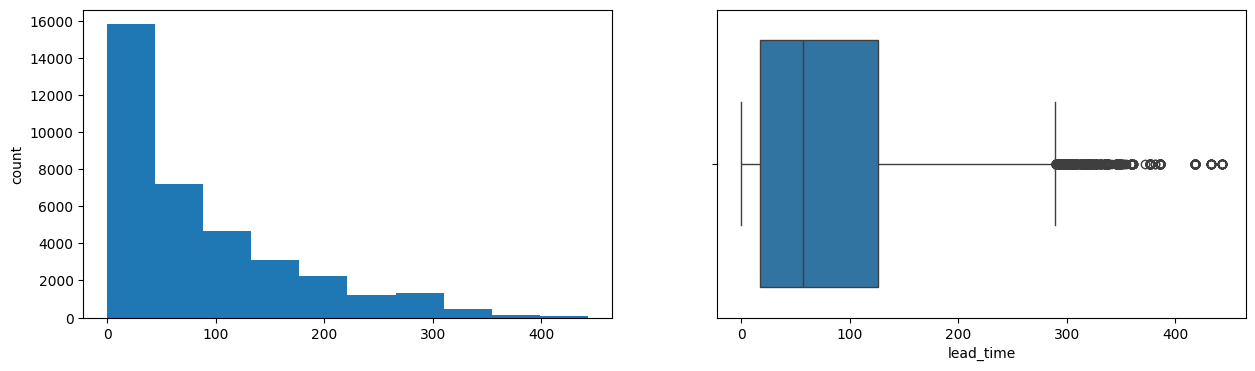

no_of_previous_cancellations
Skew : 25.2


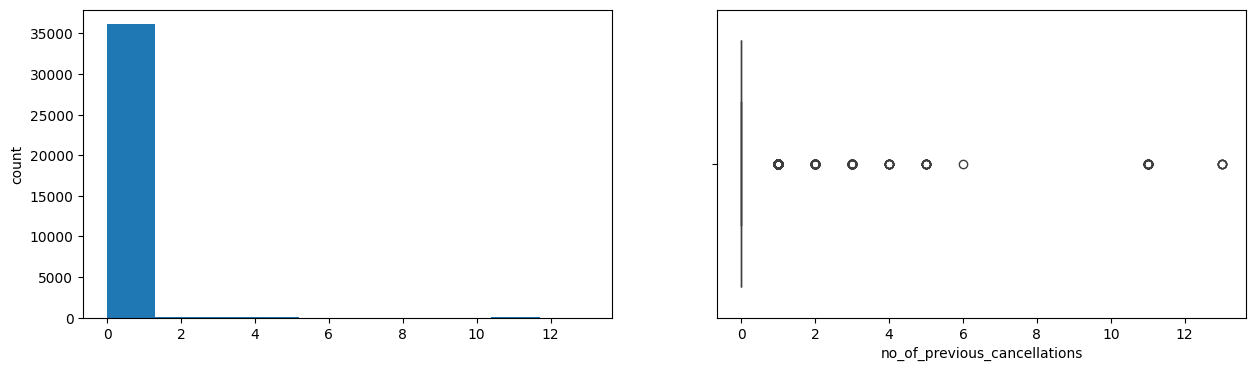

no_of_previous_bookings_not_canceled
Skew : 19.25


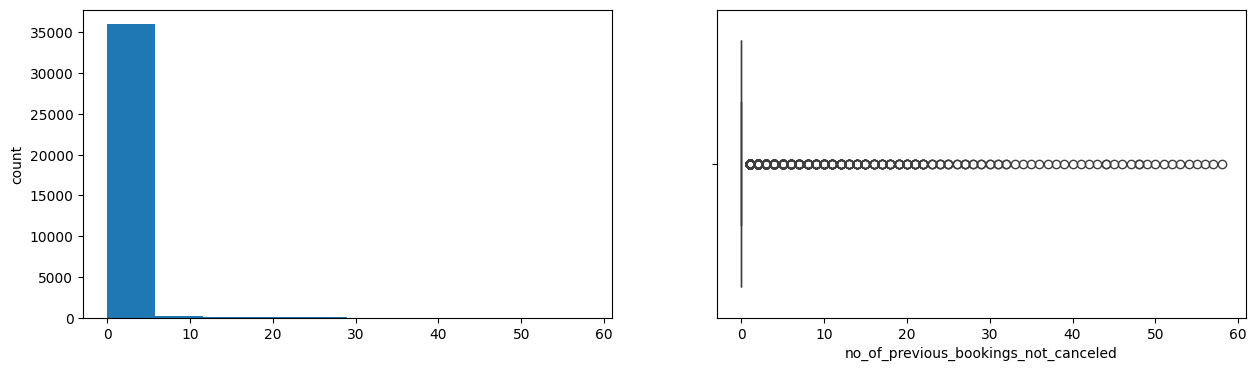

avg_price_per_room
Skew : 0.67


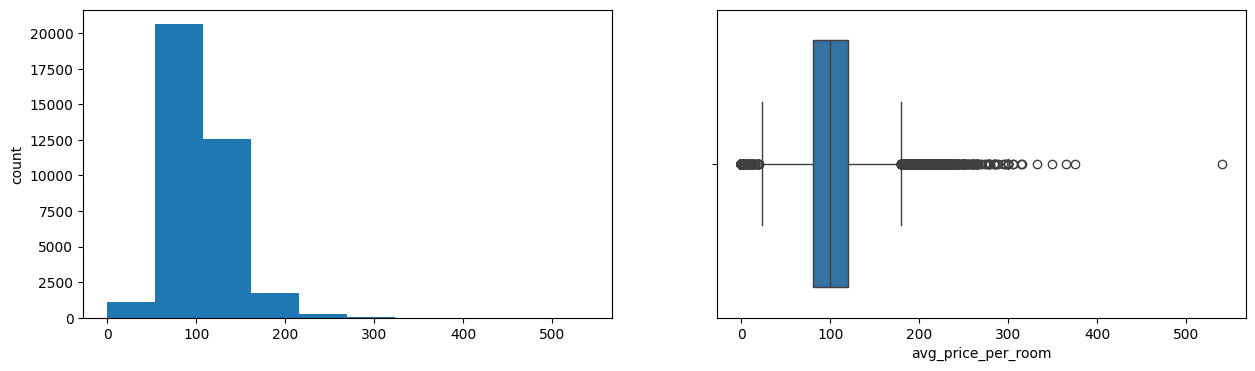

In [103]:
for col in ['lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room']:
    print(col)

    print('Skew :', round(data[col].skew(), 2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1,2,1)

    data[col].hist(bins = 10, grid = False)

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = data[col])

    plt.show()

**Observations:__**

In [104]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [105]:
Q3

120.0

In [106]:
# Assigning the value of upper whisker to outliers
data.loc[data["avg_price_per_room"] >= Q3, "avg_price_per_room"] = Upper_Whisker
# was: data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

**Now, let's check the percentage of each category for categorical variables.**

In [107]:
cat_cols = ['no_of_adults', 'no_of_children', 'no_of_week_nights', 'no_of_weekend_nights', 'required_car_parking_space',
        'type_of_meal_plan', 'room_type_reserved', 'arrival_month', 'market_segment_type', 'no_of_special_requests',
        'booking_status']

for col in cat_cols:
    print(data[col].value_counts(normalize = True))
    print('-'*15)


no_of_adults
2    0.719724
1    0.212130
3    0.063873
0    0.003832
4    0.000441
Name: proportion, dtype: float64
---------------
no_of_children
0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: proportion, dtype: float64
---------------
no_of_week_nights
2     0.315479
1     0.261558
3     0.216099
4     0.082426
0     0.065803
5     0.044493
6     0.005210
7     0.003115
10    0.001709
8     0.001709
9     0.000937
11    0.000469
15    0.000276
12    0.000248
14    0.000193
13    0.000138
17    0.000083
16    0.000055
Name: proportion, dtype: float64
---------------
no_of_weekend_nights
0    0.465114
1    0.275534
2    0.250062
3    0.004218
4    0.003556
5    0.000937
6    0.000551
7    0.000028
Name: proportion, dtype: float64
---------------
required_car_parking_space
0    0.969014
1    0.030986
Name: proportion, dtype: float64
---------------
type_of_meal_plan
Meal Plan 1     0.767333
Not Selected    0.141420
Meal Plan 2     0.09111

**Observations:________**

### **Replacing values 9 and 10 for the number of children with 3 and encoding the target variable**

In [108]:
# Replacing values 9 and 10 with 3 for the column no_of_children
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

In [109]:
# Replace 'Canceled' status with 1, 'Not Canceled' is 0.
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

**We are done with univariate analysis and data preprocessing. Let's explore the data a bit more with bivariate analysis.**

Let's check the relationship of market segment type with the average price per room.

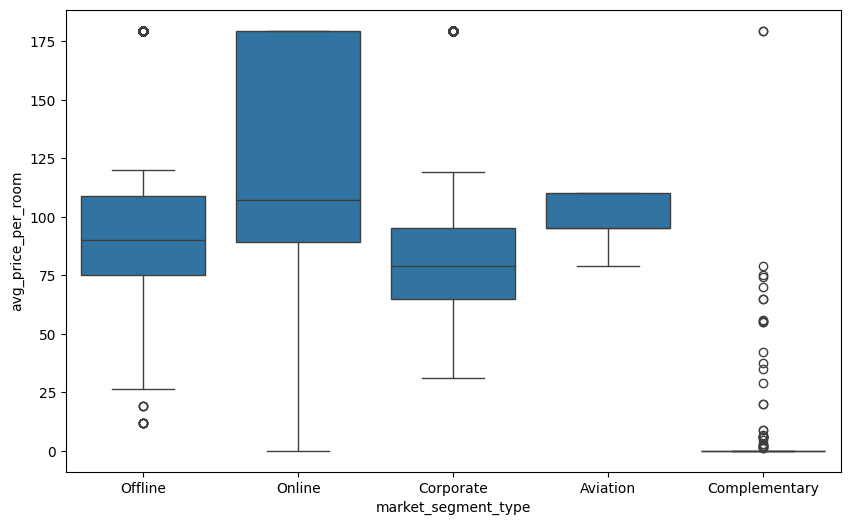

In [110]:
plt.figure(figsize = (10, 6))

sns.boxplot(data = data, x = "market_segment_type", y = "avg_price_per_room")

plt.show()

**Observations:**

* **Rooms booked online have the highest variations in prices.**
* The distribution for offline and corporate room prices are almost similar except for some outliers.
* Complementary market segment gets the rooms at very low prices, which makes sense.

**Let's see how booking status varies across different market segments. Also, how lead time impacts booking status.**

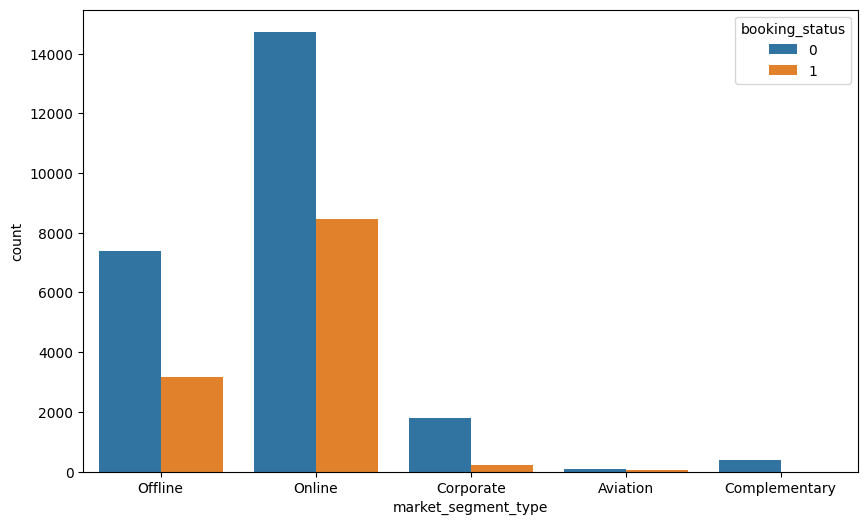

In [111]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'market_segment_type', hue = 'booking_status', data = data)

plt.show()

**Observations:**

* **Online bookings have the highest number of cancellations.**
* Bookings made offline are less prone to cancellations.
* Corporate and complementary segment also show very low number of cancellations.

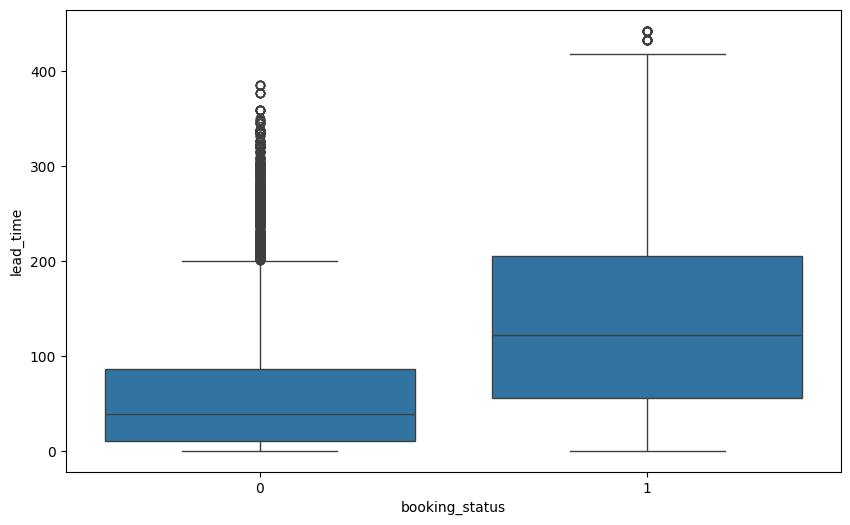

In [112]:
plt.figure(figsize = (10, 6))

sns.boxplot(data = data, x = "booking_status", y = "lead_time")

plt.show()

**Observations:**

* There's a big difference in the median value of lead time for bookings that were canceled and bookings that were not canceled.
- **The higher the lead time, the higher are the chances of a booking being canceled.**

**Now, let's check how the arrival month impacts the booking status.**

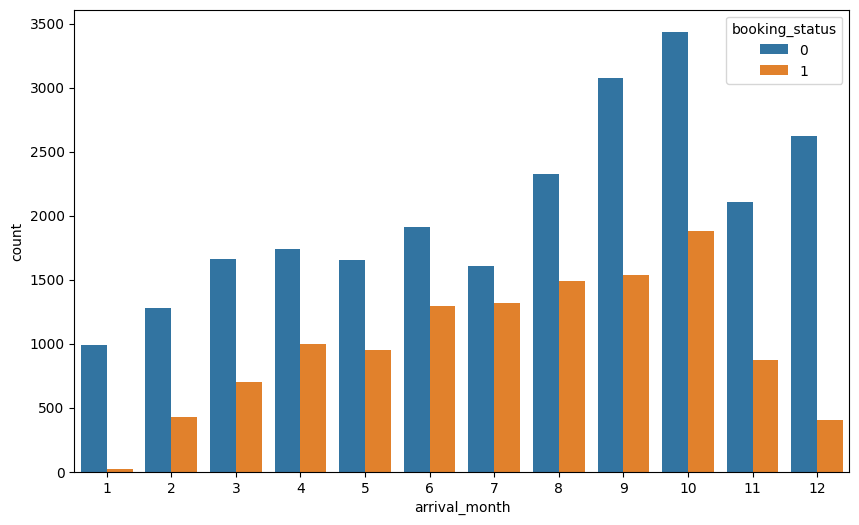

In [113]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'arrival_month', hue = 'booking_status', data = data)

plt.show()

**Observations:**

- We observed earlier that the month of October has the highest number of bookings but the above plot shows that **October has the highest number of cancellations** as well.
- Bookings made for **December and January are least prone to cancellations**.

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**

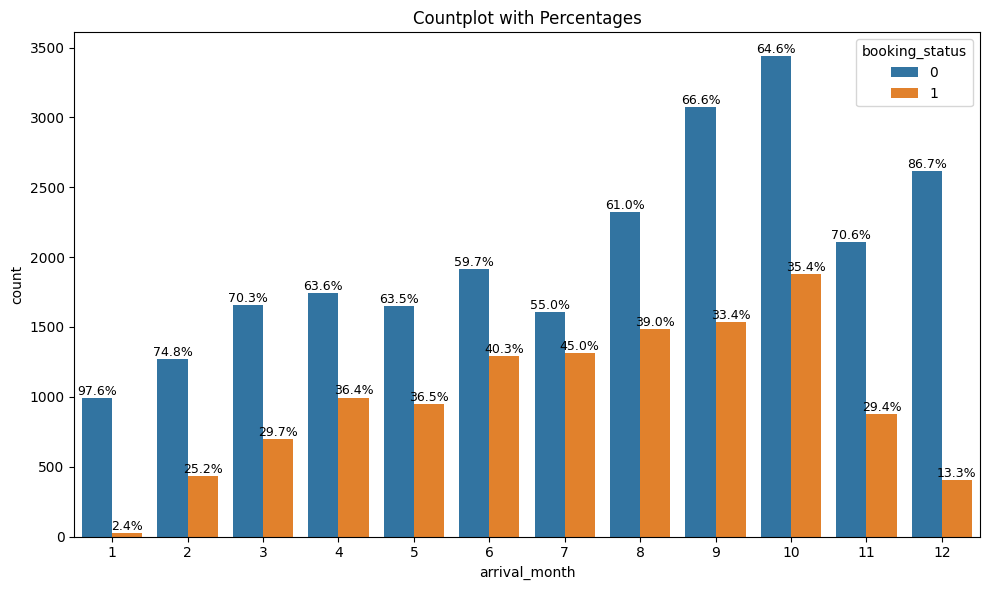

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

def countplot_with_percentage(data, x, hue):
    """
    Plots a Seaborn countplot with percentages for each hue within each category.

    Parameters:
    - data: pd.DataFrame, the dataset.
    - x: str, the name of the categorical variable (x-axis).
    - hue: str, the name of the hue variable.
    """
    # Create the countplot
    plt.figure(figsize = (10, 6))
    ax = sns.countplot(data=data, x=x, hue=hue)

    # Calculate percentages for labels
    total_counts = data.groupby(x).size()  # Total count per category
    for container in ax.containers:
        for bar in container:
            count = bar.get_height()
            if count > 0:
                category = 1 + math.floor(bar.get_x() +0.5)
                percent = (count / total_counts[category]) * 100
                ax.text(
                    bar.get_x() + bar.get_width() / 2,  # Position at the center of the bar
                    bar.get_height() + 0.5,  # Slightly above the bar
                    f"{percent:.1f}%",  # Format as percentage
                    ha="center", va="bottom", fontsize=9
                )

    # Finalize plot
    ax.set_title("Countplot with Percentages")
    plt.tight_layout()
    plt.show()

countplot_with_percentage(x = 'arrival_month', hue = 'booking_status', data = data)

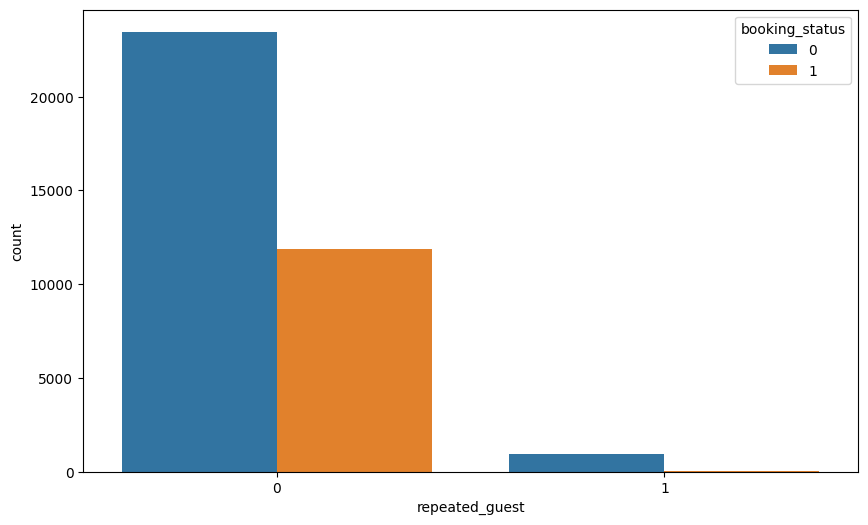

In [115]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'repeated_guest', hue = 'booking_status', data = data)

plt.show()

**Observations:**

* There are **very few repeat customers but the cancellation among them is very less**.
* This is a good indication as repeat customers are important for the hospitality industry as they can help in spreading the word of mouth.

**We have explored different combinations of variables. Now, let's see the pairwise correlations between all the variables.**

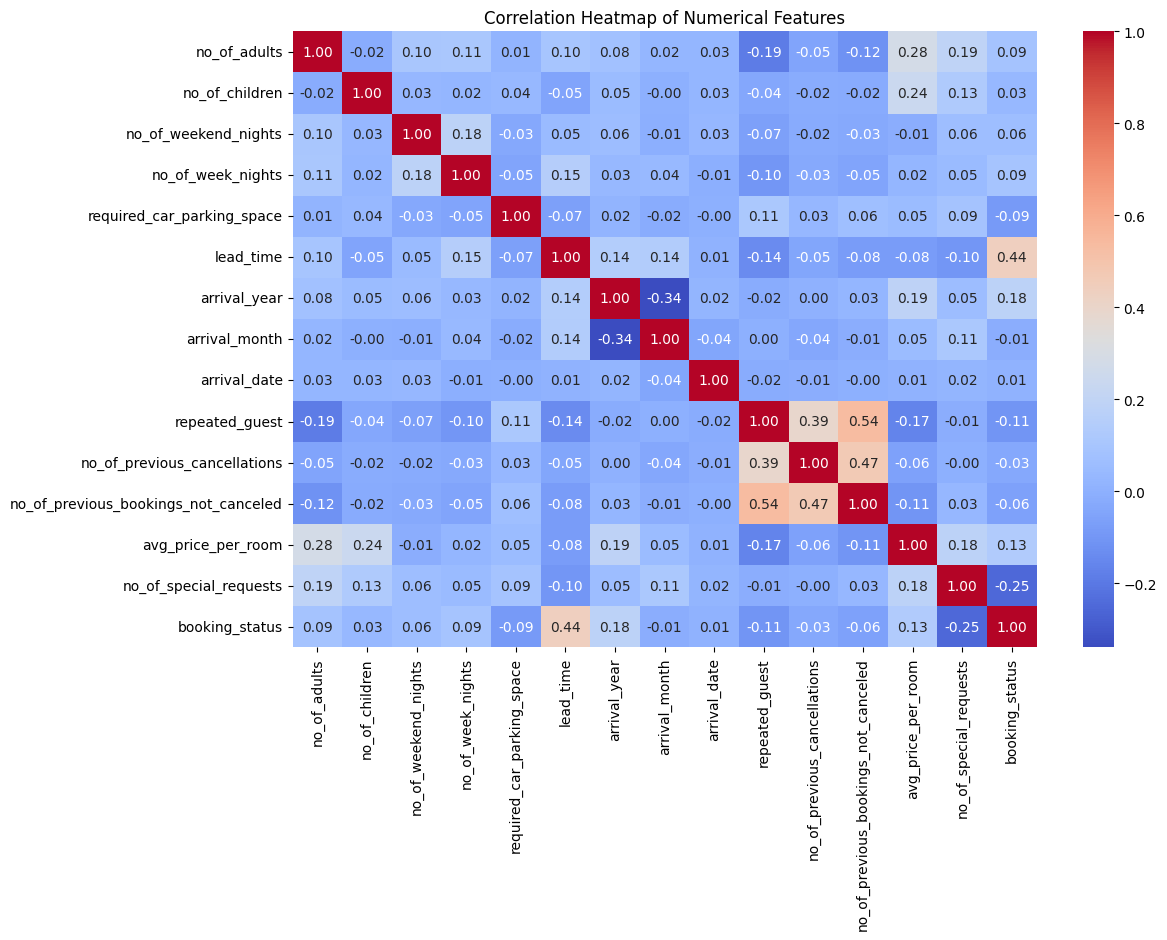

In [116]:
# Create heat map from numerical data

# Select only numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


**Observations:**


*   High correlation between lead-time and booking-status
*   High correlation between no-of-special-requests and booking-status
*   Some correlation between avg-price and booking-status



**Now that we have explored our data, let's prepare it for modeling.**

## **Preparing the data for modeling**

- Models cannot take non-numeric inputs. So, we will first create dummy variables for all the categorical variables.
- We will then split the data into train and test sets.

In [117]:
# Remove the blanks and complete the below code
X = data.drop("booking_status", axis = 1)
Y = data["booking_status"]

In [118]:
# Creating dummy variables, drop_first = True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first = True)

In [119]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [120]:
X_train.shape, X_test.shape

((25392, 27), (10883, 27))

In [121]:
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
13662,1,0,0,1,0,163,2018,10,15,0,...,False,False,False,False,False,False,False,False,True,False
26641,2,0,0,3,0,113,2018,3,31,0,...,True,False,False,False,False,False,False,False,False,True
17835,2,0,2,3,0,359,2018,10,14,0,...,False,False,False,False,False,False,False,False,True,False
21485,2,0,0,3,0,136,2018,6,29,0,...,False,False,False,False,False,False,False,False,False,True
5670,2,0,1,2,0,21,2018,8,15,0,...,False,False,False,False,False,False,False,False,False,True


In [122]:
y_test.tail()

,booking_status
12013,0
4840,0
34313,0
27390,1
9399,1


## **Building Classification Models**

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem at hand.**

### **Model evaluation criterion**

**Model can make wrong predictions as:**

1. Predicting a customer will not cancel their booking but in reality, the customer cancels their booking.
2. Predicting a customer will cancel their booking but in reality, the customer does not cancel their booking.

**Which case is more important?**
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled, then the hotel will lose resources and will have to bear additional costs of unsold rooms. The hotel might also have to bear an additional cost of advertising the room again on different distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled, then the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.


**How to reduce the losses?**

* Hotel would want `F1 Score` to be maximized, greater the F1 score, higher are the chances of minimizing False Negatives and False Positives.

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [123]:
# Function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Canceled', 'Canceled'], yticklabels = ['Not Canceled', 'Canceled'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

### **Decision Tree**

In [124]:
# Fitting the decision tree classifier on the training data
# Adjust the weights to reflect imbalace in the data
d_tree = DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, random_state = 42)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=42)

**Let's check the performance on the training data**

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17029
           1       1.00      0.98      0.99      8363

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



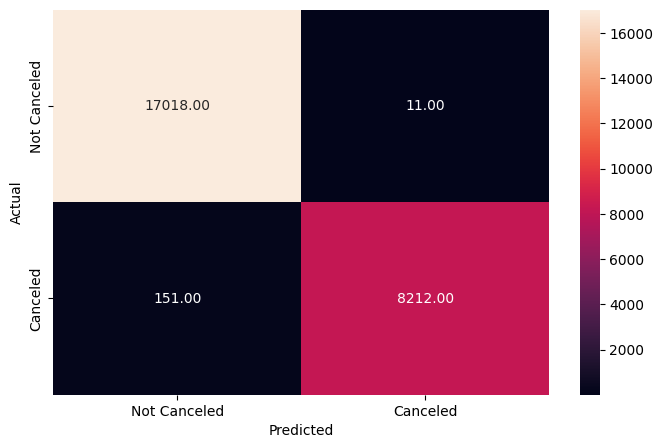

In [125]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)


**Reading confusion matrix (clockwise):**

- **True Positive**: Predicting the customer will not cancel the booking and the customer does not cancel the booking.
- **False Negative**: Predicting the customer will cancel the booking but the customer does not cancel the booking.
- **True Negative**: Predicting the customer will cancel the booking and the customer cancels the booking.
- **False Positive**: Predicting the customer will not cancel the booking but the customer cancels the booking.

**Observations:_________**


**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      7361
           1       0.79      0.81      0.80      3522

    accuracy                           0.87     10883
   macro avg       0.85      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883



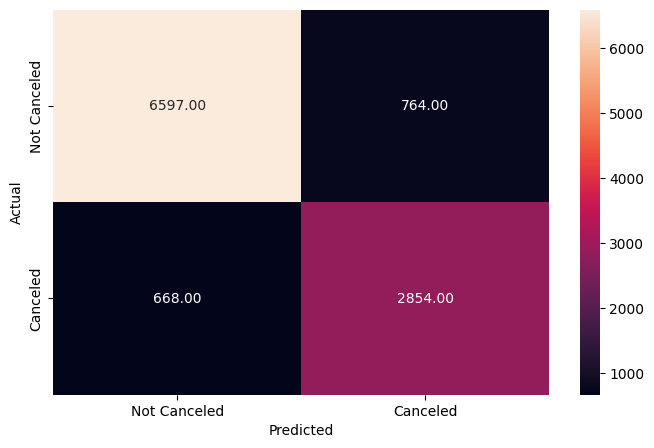

In [126]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)


**Observations:_________**

In [127]:
# Saving results for final comparison

results = pd.DataFrame(columns=['estimator', 'best_params_', 'precision', 'recall', 'f1-score', 'accuracy'])

precision = metrics.precision_score(y_test, y_pred_test1)
recall = metrics.recall_score(y_test, y_pred_test1)
f1 = metrics.f1_score(y_test, y_pred_test1)
accuracy = accuracy_score(y_test, y_pred_test1)

new_row = pd.DataFrame({'estimator': 'DecisionTreeClassifier',
                        'best_params_': 'Default',
                        'precision': precision,
                        'recall': recall,
                        'f1-score': f1,
                        'accuracy':accuracy}, index=[0])
results = pd.concat([results, new_row], ignore_index=True)

**Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth** to reduce overfitting of the model. We can tune some other hyperparameters as well.

### **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is **approximately** the opposite of the imbalance in the original data.

**This would tell the model that 1 is the important class here.**

In [128]:
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight={0: 0.67, 1: 0.33})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=9,
                       min_samples_leaf=5, random_state=7)

We have tuned the model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     17029
           1       0.89      0.68      0.77      8363

    accuracy                           0.87     25392
   macro avg       0.87      0.82      0.84     25392
weighted avg       0.87      0.87      0.86     25392



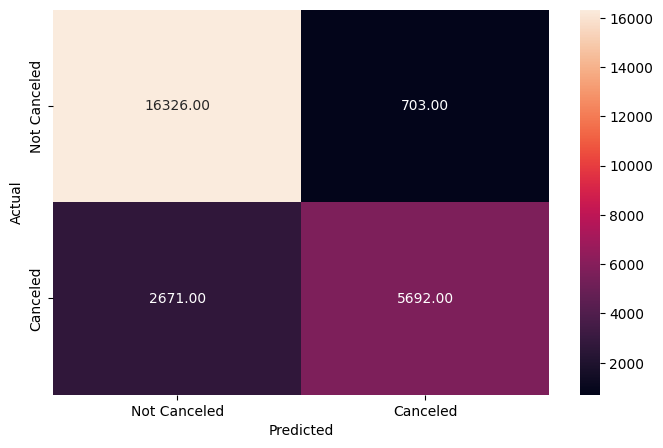

In [129]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

**Observations:__________**

**Let's check the model performance on the testing data**

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7361
           1       0.88      0.67      0.76      3522

    accuracy                           0.86     10883
   macro avg       0.87      0.81      0.83     10883
weighted avg       0.86      0.86      0.86     10883



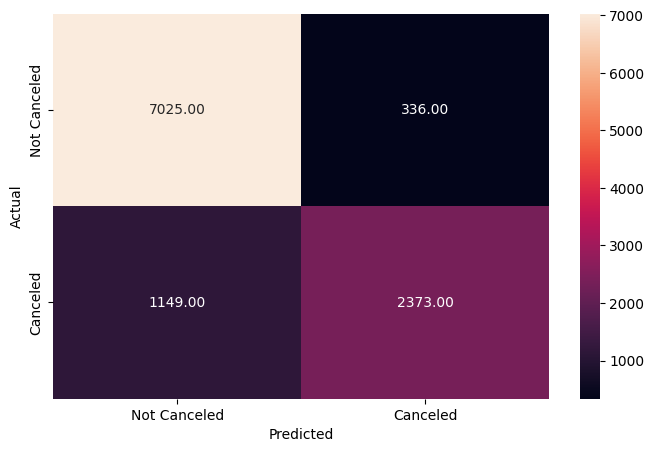

In [130]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)

In [131]:
# Saving results for comparison

precision = metrics.precision_score(y_test, y_pred_test2)
recall = metrics.recall_score(y_test, y_pred_test2)
f1 = metrics.f1_score(y_test, y_pred_test2)
accuracy = accuracy_score(y_test, y_pred_test2)


new_row = pd.DataFrame({'estimator': 'DecisionTreeClassifier',
                        'best_params_': str(grid_obj.best_params_),
                        'precision': precision,
                        'recall': recall,
                        'f1-score': f1,
                        'accuracy':accuracy}, index=[0])
results = pd.concat([results, new_row], ignore_index=True)

**Observations:__________**

**Let's visualize the tuned decision tree** and observe the decision rules:

**It is hard to visualize and interpret the tree with depth = 9, We can reduce the depth to 3 and visualize it**

In [132]:
tree_model = DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth = 3,
                       min_samples_leaf = 5, random_state = 7)

# Fit the best algorithm to the data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=3,
                       min_samples_leaf=5, random_state=7)

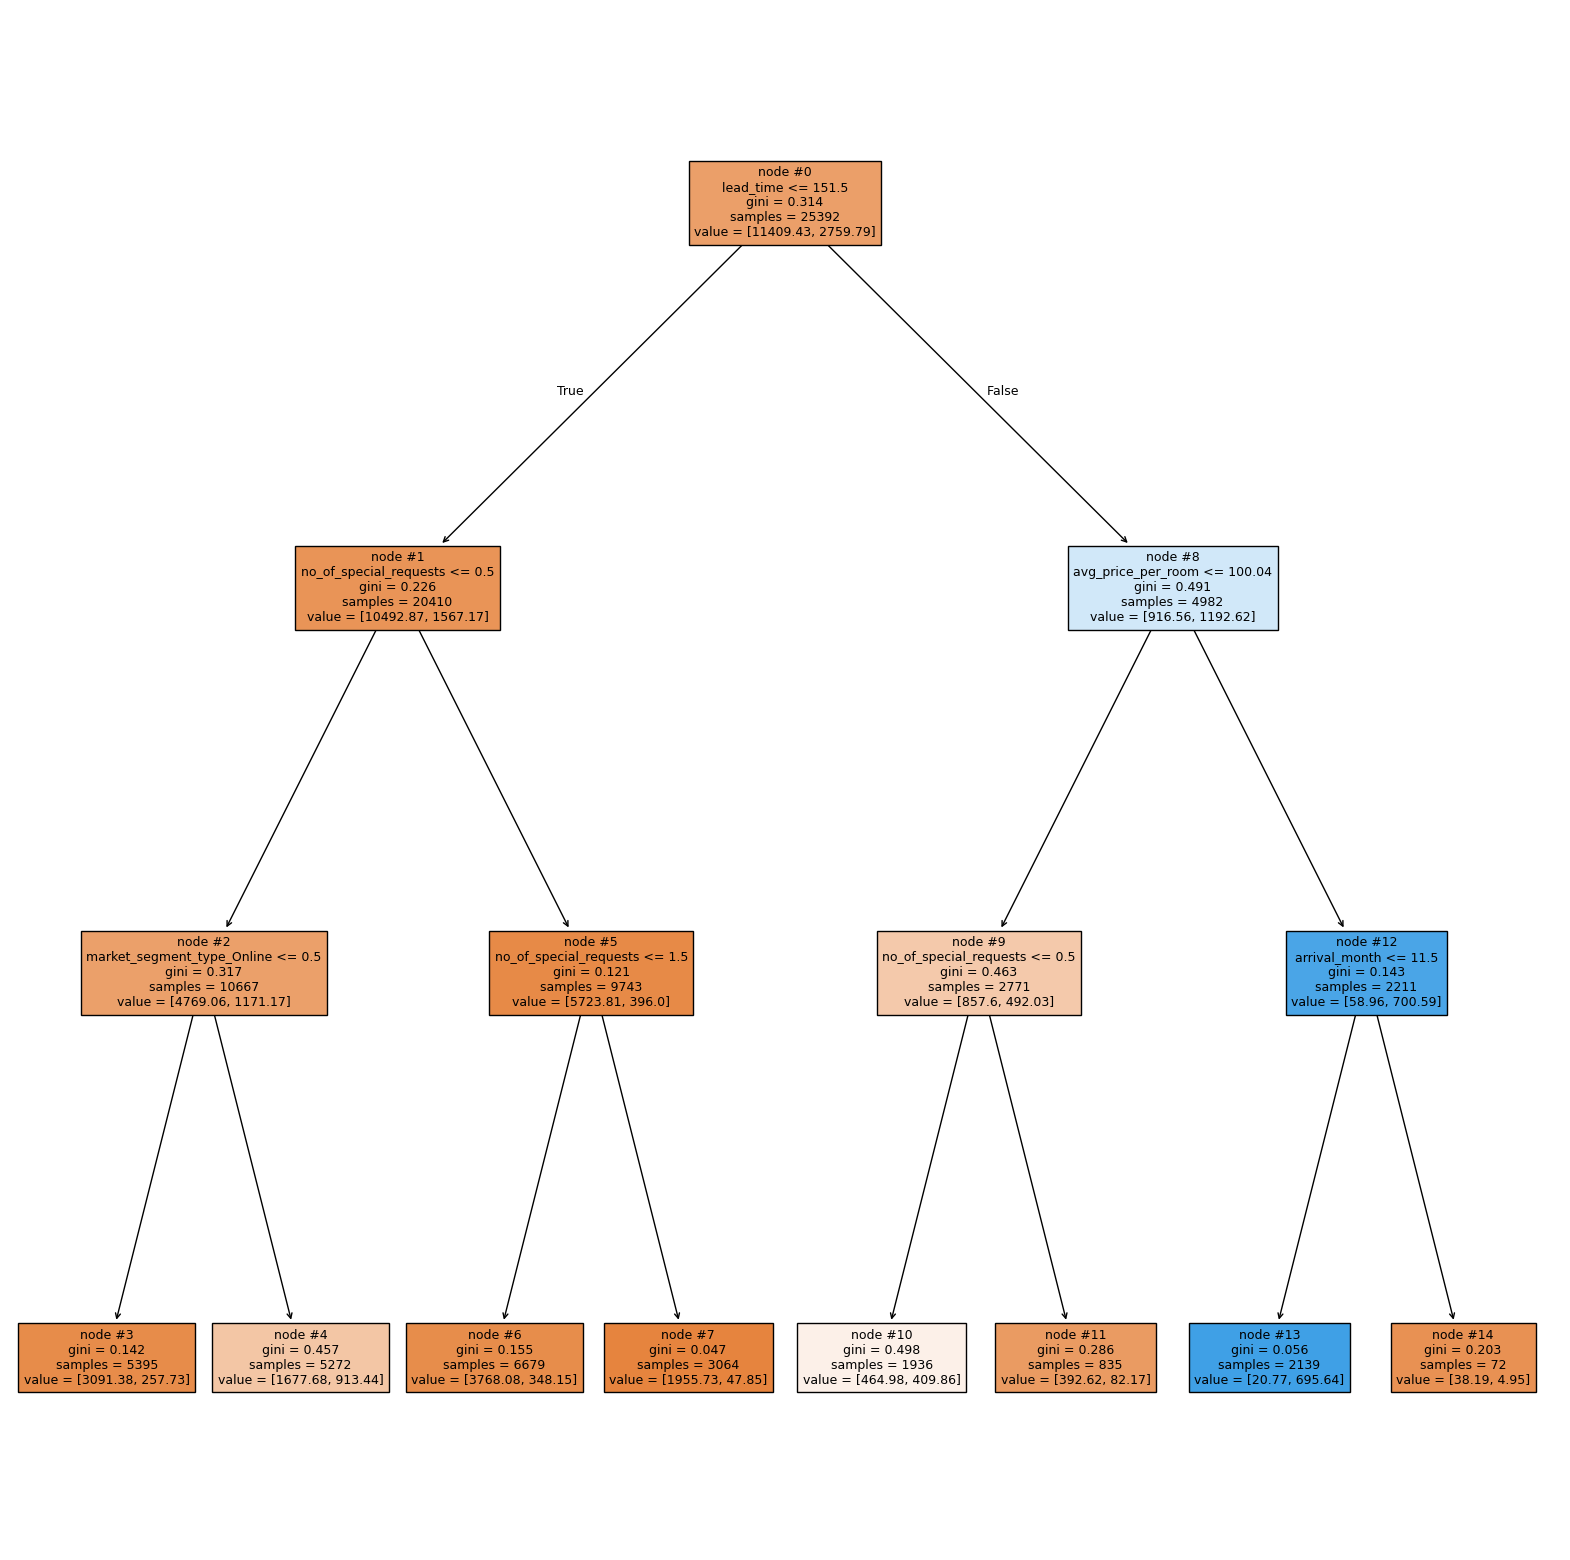

In [133]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(tree_model, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = None)

plt.show()

**Observations:_____**

**Let's look at the feature importance** of the tuned decision tree model

In [134]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                               Imp
lead_time                             4.000403e-01
avg_price_per_room                    1.940991e-01
market_segment_type_Online            1.445894e-01
no_of_special_requests                9.049192e-02
arrival_month                         6.209127e-02
no_of_adults                          2.737387e-02
arrival_date                          2.077680e-02
no_of_weekend_nights                  1.816266e-02
no_of_week_nights                     1.562540e-02
required_car_parking_space            9.004208e-03
market_segment_type_Offline           4.329102e-03
type_of_meal_plan_Not Selected        3.874940e-03
arrival_year                          3.628546e-03
type_of_meal_plan_Meal Plan 2         3.225260e-03
room_type_reserved_Room_Type 6        1.710869e-03
no_of_children                        5.039079e-04
room_type_reserved_Room_Type 4        2.469994e-04
room_type_reserved_Room_Type 2        1.907008e-04
room_type_reserved_Room_Type 5 

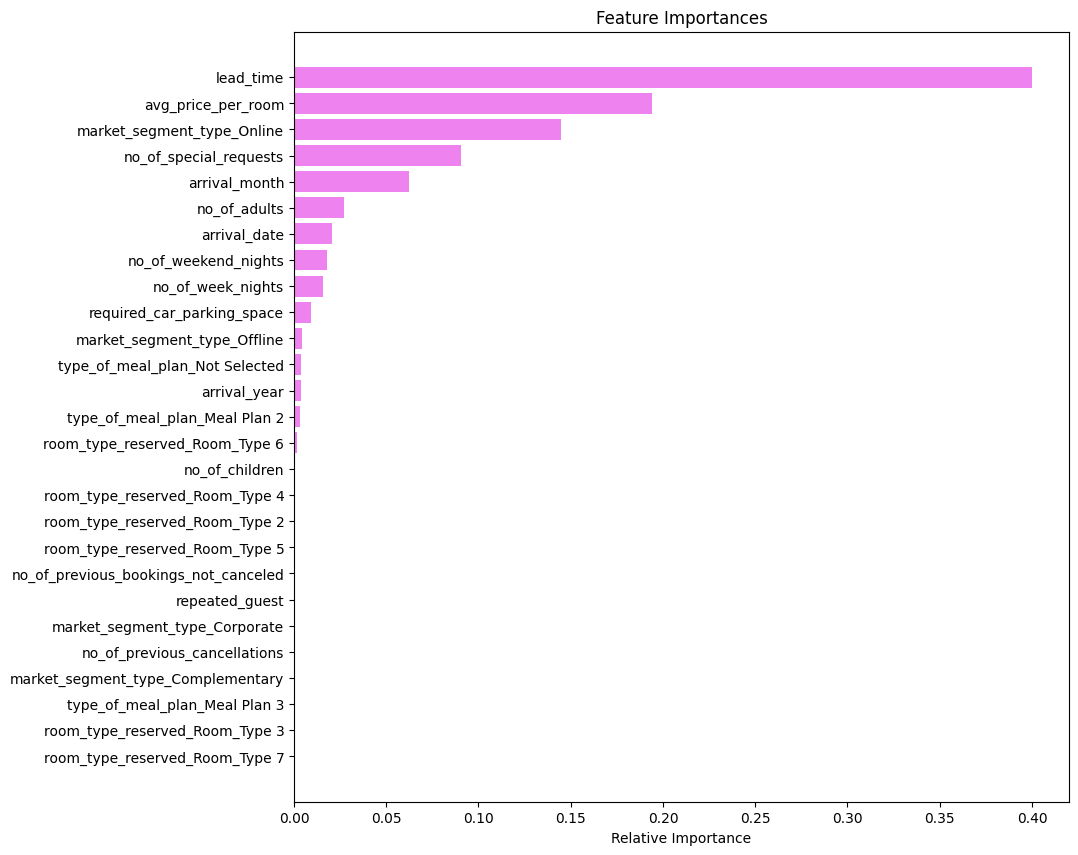

In [135]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:__________**

### **Random Forest Classifier**

In [136]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, random_state = 42)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=42)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17029
           1       1.00      0.98      0.99      8363

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



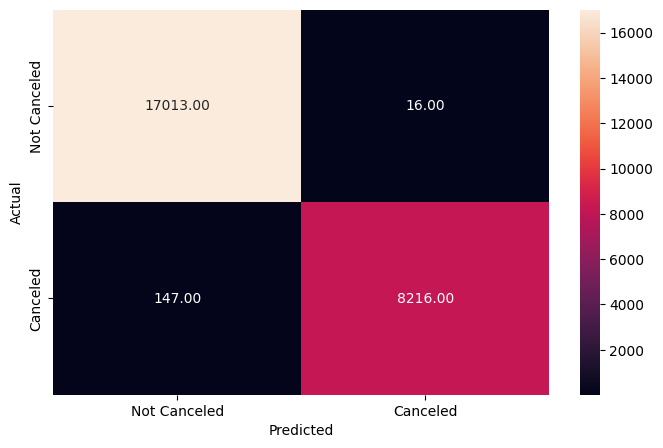

In [137]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)


**Observations:__________**

**Let's check the performance on the testing data**

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7361
           1       0.88      0.81      0.85      3522

    accuracy                           0.90     10883
   macro avg       0.90      0.88      0.89     10883
weighted avg       0.90      0.90      0.90     10883



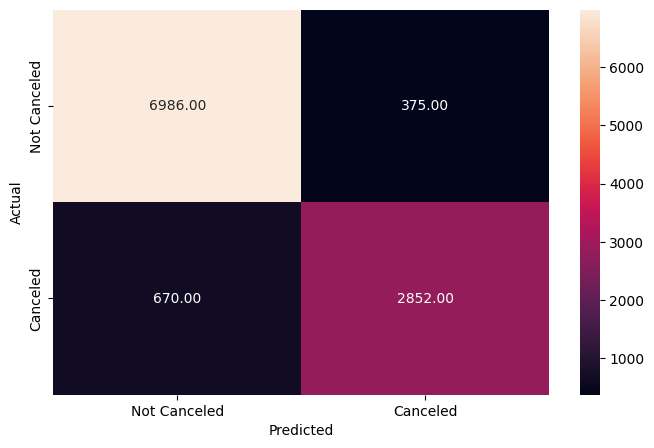

In [138]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)


In [141]:
# Saving results for comparison

precision = metrics.precision_score(y_test, y_pred_test3)
recall = metrics.recall_score(y_test, y_pred_test3)
f1 = metrics.f1_score(y_test, y_pred_test3)
accuracy = accuracy_score(y_test, y_pred_test3)


new_row = pd.DataFrame({'estimator': 'RandomForestClassifier',
                        'best_params_': 'Default',
                        'precision': precision,
                        'recall': recall,
                        'f1-score': f1,
                        'accuracy':accuracy}, index=[0])
results = pd.concat([results, new_row], ignore_index=True)

**Let's see if we can get a better model by tuning the random forest classifier**

Let's try **tuning some of the important hyperparameters of the Random Forest Classifier**.

We will **not** tune the `criterion` hyperparameter as we know from hyperparameter tuning for decision trees that `entropy` is a better splitting criterion for this data.

In [142]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", class_weight={0: 0.67, 1: 0.33}, random_state = 42)

# Grid of parameters to choose from
parameters = {"n_estimators": [80, 90, 110],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [143]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, criterion='entropy',
                       max_depth=7, max_features=0.8, n_estimators=110,
                       random_state=42)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     17029
           1       0.90      0.57      0.70      8363

    accuracy                           0.84     25392
   macro avg       0.86      0.77      0.80     25392
weighted avg       0.85      0.84      0.83     25392



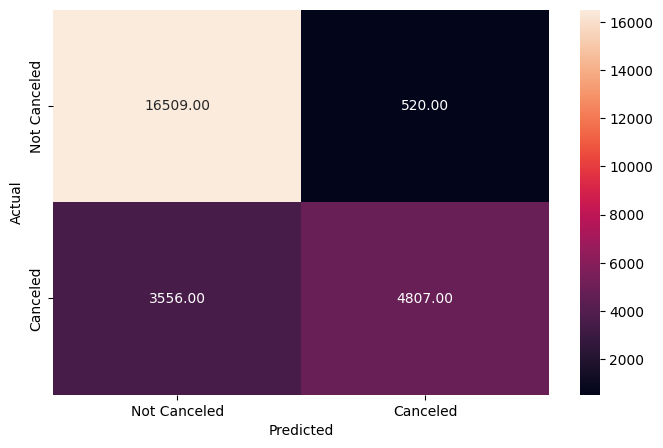

In [144]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train4)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7361
           1       0.90      0.57      0.70      3522

    accuracy                           0.84     10883
   macro avg       0.86      0.77      0.79     10883
weighted avg       0.85      0.84      0.83     10883



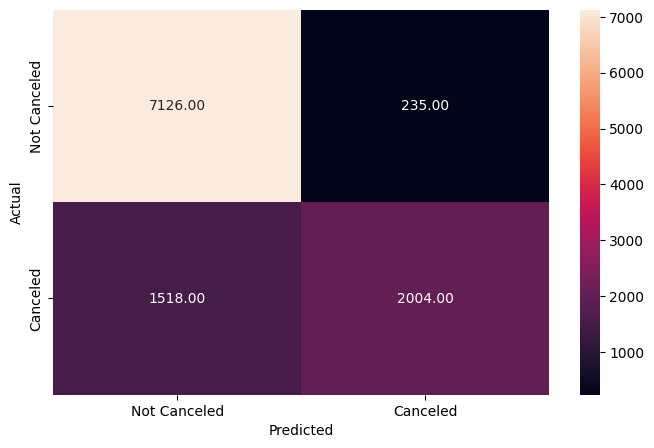

In [145]:
# Checking performance on the training data
y_pred_test4 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test4)

**Observations:__________**

In [146]:
# Saving results for comparison

precision = metrics.precision_score(y_test, y_pred_test4)
recall = metrics.recall_score(y_test, y_pred_test4)
f1 = metrics.f1_score(y_test, y_pred_test4)
accuracy = accuracy_score(y_test, y_pred_test4)


new_row = pd.DataFrame({'estimator': 'RandomForestClassifier',
                        'best_params_': str(grid_obj.best_params_),
                        'precision': precision,
                        'recall': recall,
                        'f1-score': f1,
                        'accuracy':accuracy}, index=[0])
results = pd.concat([results, new_row], ignore_index=True)

**Note:** **GridSearchCV can take a long time to run** depending on the number of hyperparameters and the number of values tried for each hyperparameter. **Therefore, we have reduced the number of values passed to each hyperparameter.**

**Note:** The below code might take some time to run depending on your system's configuration.

In [147]:
# Choose the type of classifier
rf_estimator_tuned2 = RandomForestClassifier(criterion = "entropy", class_weight={0: 0.67, 1: 0.33}, random_state = 42)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned2, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned2 = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=20, n_estimators=120, random_state=42)

**Let's check the performance of the tuned model**

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     17029
           1       0.78      0.78      0.78      8363

    accuracy                           0.86     25392
   macro avg       0.84      0.84      0.84     25392
weighted avg       0.86      0.86      0.86     25392



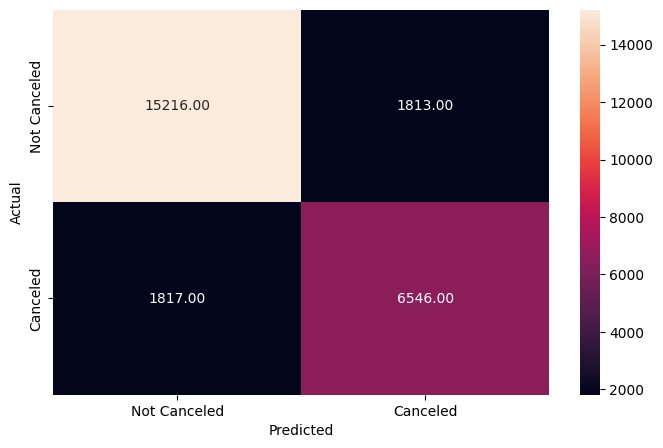

In [148]:
# Checking performance on the training data
y_pred_train5 = rf_estimator_tuned2.predict(X_train)

metrics_score(y_train, y_pred_train5)

**Observations:________**

**Let's check the model performance on the test data**

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7361
           1       0.77      0.78      0.77      3522

    accuracy                           0.85     10883
   macro avg       0.83      0.83      0.83     10883
weighted avg       0.85      0.85      0.85     10883



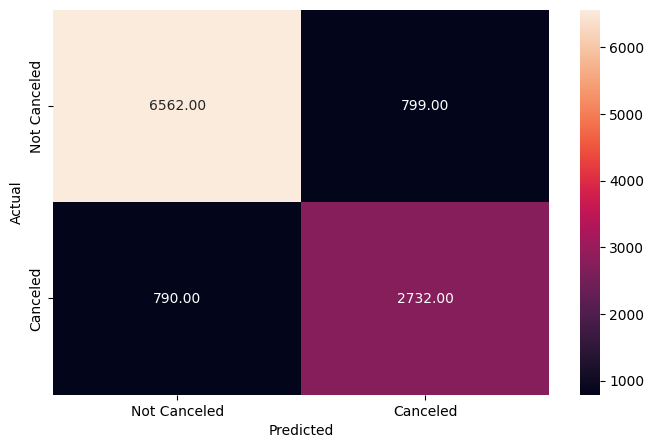

In [149]:
# Checking performance on the test data
y_pred_test5 = rf_estimator_tuned2.predict(X_test)

metrics_score(y_test, y_pred_test5)

**Observations:___________**

In [150]:
# Saving results for comparison

precision = metrics.precision_score(y_test, y_pred_test5)
recall = metrics.recall_score(y_test, y_pred_test5)
f1 = metrics.f1_score(y_test, y_pred_test5)
accuracy = accuracy_score(y_test, y_pred_test5)


new_row = pd.DataFrame({'estimator': 'RandomForestClassifier',
                        'best_params_': str(grid_obj.best_params_),
                        'precision': precision,
                        'recall': recall,
                        'f1-score': f1,
                        'accuracy':accuracy}, index=[0])
results = pd.concat([results, new_row], ignore_index=True)

**One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model. We cannot observe the decision rules for random forests the way we did for decision trees. So, let's just check the feature importance of the model.**

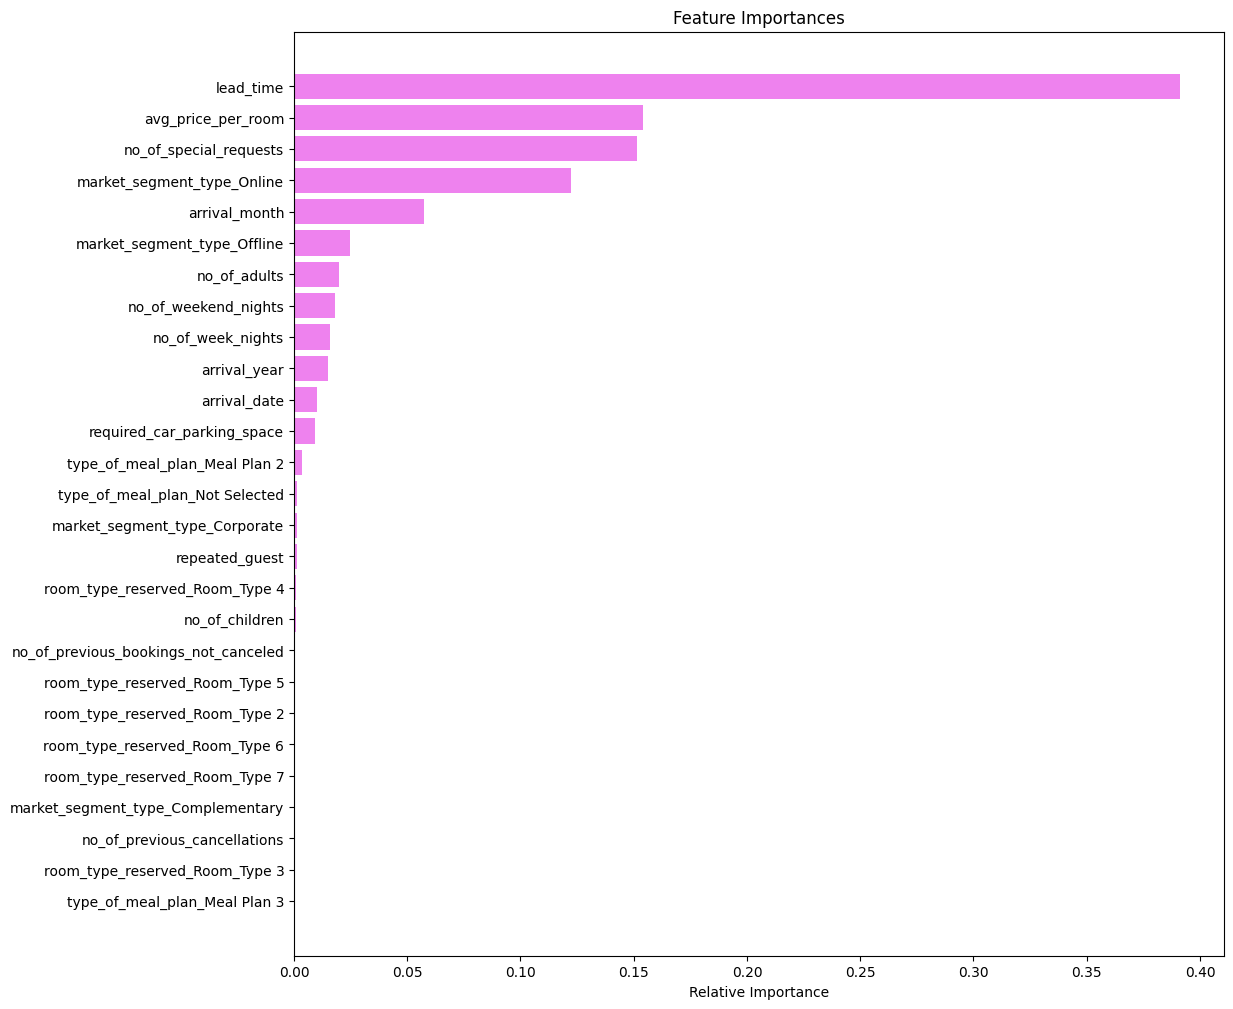

In [151]:
importances = rf_estimator_tuned2.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:________**

In [152]:
# Show final comparison

results

,estimator,best_params_,precision,recall,f1-score,accuracy
0,DecisionTreeClassifier,Default,0.788834,0.810335,0.799440,0.868419
1,DecisionTreeClassifier,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.875969,0.673765,0.761675,0.863549
2,RandomForestClassifier,Default,0.883793,0.809767,0.845162,0.903979
3,RandomForestClassifier,Default,0.883793,0.809767,0.845162,0.903979
4,RandomForestClassifier,"{'max_depth': 7, 'max_features': 0.8, 'n_estim...",0.895042,0.568995,0.695713,0.838923
5,RandomForestClassifier,"{'class_weight': 'balanced', 'max_depth': 7, '...",0.773718,0.775696,0.774706,0.853992


# Trying XGBoost classifier

In [153]:
# Train with XGboost

!pip install xgboost
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     17029
           1       0.90      0.85      0.87      8363

    accuracy                           0.92     25392
   macro avg       0.91      0.90      0.91     25392
weighted avg       0.92      0.92      0.92     25392



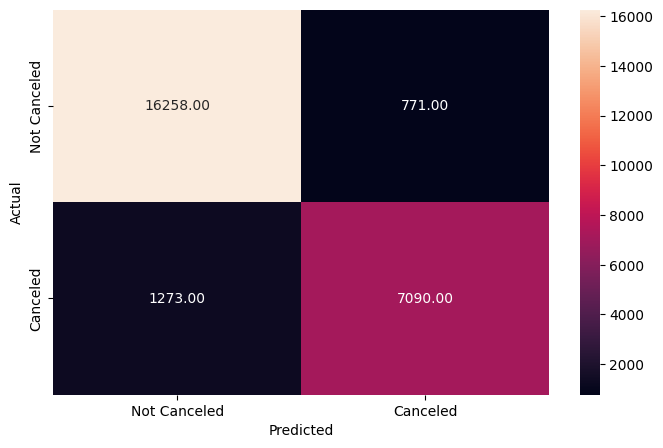

In [154]:
# Checking performance on the training data
y_pred_train_xgb = xgb_model.predict(X_train)

metrics_score(y_train, y_pred_train_xgb)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      7361
           1       0.86      0.81      0.83      3522

    accuracy                           0.90     10883
   macro avg       0.89      0.87      0.88     10883
weighted avg       0.90      0.90      0.90     10883



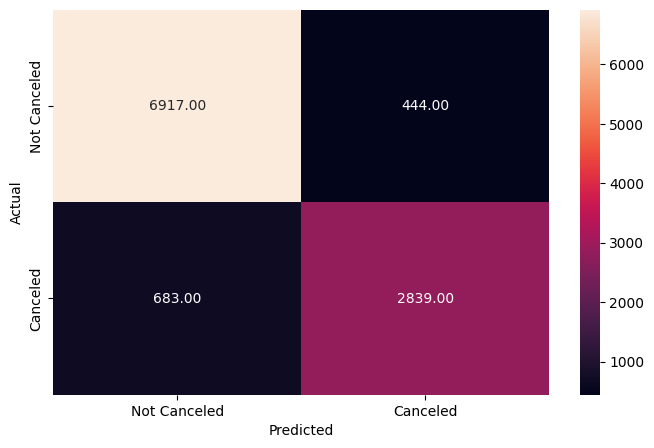

In [155]:
# Checking performance on the test data
y_pred_test_xgb = xgb_model.predict(X_test)

metrics_score(y_test, y_pred_test_xgb)

In [156]:
# Saving results for comparison

precision = metrics.precision_score(y_test, y_pred_test_xgb)
recall = metrics.recall_score(y_test, y_pred_test_xgb)
f1 = metrics.f1_score(y_test, y_pred_test_xgb)
accuracy = accuracy_score(y_test, y_pred_test_xgb)


new_row = pd.DataFrame({'estimator': 'XGboost',
                        'best_params_': 'Default',
                        'precision': precision,
                        'recall': recall,
                        'f1-score': f1,
                        'accuracy':accuracy}, index=[0])
results = pd.concat([results, new_row], ignore_index=True)

results

,estimator,best_params_,precision,recall,f1-score,accuracy
0,DecisionTreeClassifier,Default,0.788834,0.810335,0.799440,0.868419
1,DecisionTreeClassifier,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.875969,0.673765,0.761675,0.863549
2,RandomForestClassifier,Default,0.883793,0.809767,0.845162,0.903979
3,RandomForestClassifier,Default,0.883793,0.809767,0.845162,0.903979
4,RandomForestClassifier,"{'max_depth': 7, 'max_features': 0.8, 'n_estim...",0.895042,0.568995,0.695713,0.838923
5,RandomForestClassifier,"{'class_weight': 'balanced', 'max_depth': 7, '...",0.773718,0.775696,0.774706,0.853992
6,XGboost,Default,0.864758,0.806076,0.834386,0.896444


### **Conclusion:**

Random Forest with default parameters gave the best results.
XGBoost gives very similar results to RandomForest.

### **Recommendations:**

Write your recommendations here.